<a href="https://colab.research.google.com/github/BelenUrdangarin/Integrador-Urdangarin---Olivera/blob/main/Integrador_Olivera_Urdangarin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Energia renovable

Objetivo:
- Analizar la situación actual de los diferentes paises en material energetico, de población y de consumo energetico
- Analizar la mayor fuente de energia renovable por pais
- Ver la tendencia de los paises segun el ingreso
- Ver patrones climaticos de los paises de interes para generar soluciones en materia de energias renovables.
- Hacer un analisis de lo anterior por region de forma comparativa

Acceso a la DATA
- https://data360.worldbank.org/en/dataset/WB_SE4ALL (otro)
- https://www.kaggle.com/code/mehmetisik/02-the-evolution-of-modern-renewable-energy/input?select=01+renewable-share-energy.csv


Bibliografia
- https://www.irena.org/-/media/Files/IRENA/Agency/Publication/2022/Mar/IRENA_Renewable_Roadmap_Central_America_2022_ES.pdf

## Que tipos de energias renovables existen?
- Solar: se obtiene del sol a través de la radiación electromagnética, que incluye luz, calor y rayos ultravioleta. Se puede aprovechar de diferentes maneras, como con paneles solares fotovoltaicos y colectores solares térmicos.

- Eólica: aprovecha la fuerza del viento para generar electricidad. Este proceso se realiza a través de aerogeneradores, que capturan la energía cinética del viento y la convierten en electricidad.

- Hidráulica: utiliza la fuerza del agua en movimiento para generar electricidad.  Se aprovecha la energía cinética y potencial del agua en saltos de agua, corrientes o mareas para mover turbinas, las cuales, a través de un generador, producen electricidad.

- Otras: Dentro de esta categoria encontramos

 - Energía de Biomasa: Se aprovecha la materia orgánica (residuos orgánicos, cultivos energéticos, etc.) para generar energía, ya sea mediante combustión o conversión en biocombustibles.
 - Energía Geotérmica: Se utiliza el calor del interior de la Tierra para generar electricidad o calefacción.
 - Energía Marina: Se aprovecha la energía de las olas, mareas y corrientes marinas para generar electricidad.
 - Energía Mareomotriz: Utiliza la fuerza de las mareas para generar electricidad.
 - Energía Undimotriz: Utiliza la energía de las olas para generar electricidad.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore

Vamos a cargar todos los archivos que vamos a utilizar, en orden de carga tenemos:

- En *ren_ener* encontramos datos sobre el acceso que tiene la poblacion de un país, rural o urbana a la electricidad, junto con la eficiencia energetica de cada país.
- En *cons_ren* encontramos el consumo de energia por país, continente y región.
- En *prod_ren* encontramos la producción de energia por país, región y continente.
- En *clim_pais*

In [3]:
ren_ener = pd.read_csv("https://raw.githubusercontent.com/BelenUrdangarin/Integrador-Urdangarin---Olivera/main/sus_ener.csv", sep=',',on_bad_lines='skip',na_values="..") #Importo los datos
cons_ren = pd.read_csv("https://raw.githubusercontent.com/BelenUrdangarin/Integrador-Urdangarin---Olivera/main/consener.csv", sep=',',on_bad_lines='skip',na_values="..")
prod_ren = pd.read_csv("https://raw.githubusercontent.com/BelenUrdangarin/Integrador-Urdangarin---Olivera/main/prodener.csv", sep=',',on_bad_lines='skip',na_values="..")
clim_pais = pd.read_csv("https://raw.githubusercontent.com/BelenUrdangarin/Integrador-Urdangarin---Olivera/main/GlobalWeatherRepository.csv", sep=',',on_bad_lines='skip',na_values="..")
pob_Rural = pd.read_csv("https://raw.githubusercontent.com/BelenUrdangarin/Integrador-Urdangarin---Olivera/main/Pob_Rural.csv", na_values=["..", "n/a", "NA", ""])
#Fue necesario especificar el separador de columnas, saltear columnas que tengan datos extras
#Ademas de especificarle a pandas cual era el formato que utilizaba el dataframe como dato vacio, ya que no lo reconocia

## Produccion mundial de energia renovable por continente y región

In [4]:
#Veamos cuantos datos manejamos
prod_ren.shape


(8851, 7)

In [5]:
prod_ren.tail() #Va hasta el año 2021

,Entity,Code,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh)
8846,Zimbabwe,ZWE,2017,0.0,3.97,0.01,0.32
8847,Zimbabwe,ZWE,2018,0.0,5.05,0.02,0.39
8848,Zimbabwe,ZWE,2019,0.0,4.17,0.03,0.38
8849,Zimbabwe,ZWE,2020,0.0,3.81,0.03,0.35
8850,Zimbabwe,ZWE,2021,0.0,4.00,0.04,0.38


In [6]:
prod_ren.head(10) #Comienza en el año 2000

,Entity,Code,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh)
0,Afghanistan,AFG,2000,0.0,0.31,0.0,0.0
1,Afghanistan,AFG,2001,0.0,0.50,0.0,0.0
2,Afghanistan,AFG,2002,0.0,0.56,0.0,0.0
3,Afghanistan,AFG,2003,0.0,0.63,0.0,0.0
4,Afghanistan,AFG,2004,0.0,0.56,0.0,0.0
5,Afghanistan,AFG,2005,0.0,0.59,0.0,0.0
6,Afghanistan,AFG,2006,0.0,0.64,0.0,0.0
7,Afghanistan,AFG,2007,0.0,0.75,0.0,0.0
8,Afghanistan,AFG,2008,0.0,0.54,0.0,0.0
9,Afghanistan,AFG,2009,0.0,0.78,0.0,0.0


In [7]:
prod_ren.columns

Index(['Entity', 'Code', 'Year', 'Electricity from wind (TWh)',
       'Electricity from hydro (TWh)', 'Electricity from solar (TWh)',
       'Other renewables including bioenergy (TWh)'],
      dtype='object')

In [ ]:
prod_ren.drop(['Code'], axis=1, inplace=True) #Eliminamos la columna de codigo ya que no se encuentra relevante

In [ ]:
prod_ren.head() #Comprobamos

,Entity,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh)
0,Afghanistan,2000,0.0,0.31,0.0,0.0
1,Afghanistan,2001,0.0,0.50,0.0,0.0
2,Afghanistan,2002,0.0,0.56,0.0,0.0
3,Afghanistan,2003,0.0,0.63,0.0,0.0
4,Afghanistan,2004,0.0,0.56,0.0,0.0


In [ ]:
prod_ren.rename(columns = {"Entity":"Country", "Electricity from wind (TWh)":"Wind (TWh)","Electricity from hydro (TWh)":"Hydro (TWh)", "Electricity from solar (TWh)":"Solar (TWh)", "Other renewables including bioenergy (TWh)":"Others (TWh)"}, inplace=True)

In [ ]:
prod_ren.columns

Index(['Country', 'Year', 'Wind (TWh)', 'Hydro (TWh)', 'Solar (TWh)',
       'Others (TWh)'],
      dtype='object')

Chequeamos valores nulos o faltantes:

In [ ]:
prod_ren.isna().sum()

,0
Country,0
Year,0
Wind (TWh),175
Hydro (TWh),11
Solar (TWh),168
Others (TWh),220


En este caso lo datos que se encuentran en cero no resultan una preocupación ya que la produccion de algun tipo de energia puede ser cero. Durante muchos años la producción de energia renovable no fue una opción y muchos paises no cuentan con las condiciones favorables para tener una de las diferentes clases de energía.


In [ ]:
#La base de datos tiene una mezcla entre continentes, paises y de mas, asi que esta seccion es para crear diferentes
# bases de datos limpios
Contin = ['Africa','Asia','Europe', 'North America', 'Oceania', 'South America','World']
Empre = ['CIS (BP)','Africa (BP)','Africa (Ember)','Asia (Ember)','Europe (BP)','Europe (Ember)','European Union (27) (Ember)','North America (BP)','North America (Ember)','Oceania (Ember)','Latin America and Caribbean (Ember)']
Ggroup = ['G20 (Ember)', 'G7 (Ember)', 'Non-OECD (BP)','OECD (BP)','OECD (Ember)','USSR']
Incom_cont = ['High-income countries', 'Low-income countries','Lower-middle-income countries','Upper-middle-income countries']
Region = ['Central America (BP)','Asia Pacific (BP)','Eastern Africa (BP)','European Union (27)','South and Central America (BP)','Middle Africa (BP)','Middle East (BP)','North America','Western Africa (BP)']

In [ ]:
cont_prod = prod_ren[prod_ren['Country'].isin(Contin)].reset_index() #Creamos un dataframe para los continentes
incom_prod = prod_ren[prod_ren['Country'].isin(Incom_cont)].reset_index() #Dataframe para los rangos de paises
region_prod = prod_ren[prod_ren['Country'].isin(Region)].reset_index() #Dataframe para las regiones en el mundo
cont_prod.drop(['index'], axis=1, inplace=True)
incom_prod.drop(['index'], axis=1, inplace=True)
region_prod.drop(['index'], axis=1, inplace=True)
region_prod['Country'] = region_prod['Country'].str.replace(r'\s+\(.*?\)$', '', regex=True) #Elimina los nombres incomodos al final de la region

In [ ]:
categorias = Contin + Empre + Ggroup + Incom_cont + Region #Sumamor todas aquellas filas que no queremos en el dataframe de paises
prod_ren_fil = prod_ren[~prod_ren['Country'].isin(categorias)].reset_index() #Le quitamos al dataframe original las otras categorias
prod_ren_fil.drop(['index'], axis=1, inplace=True)
print(prod_ren_fil)

          Country  Year  Wind (TWh)  Hydro (TWh)  Solar (TWh)  Others (TWh)
0     Afghanistan  2000         0.0         0.31         0.00          0.00
1     Afghanistan  2001         0.0         0.50         0.00          0.00
2     Afghanistan  2002         0.0         0.56         0.00          0.00
3     Afghanistan  2003         0.0         0.63         0.00          0.00
4     Afghanistan  2004         0.0         0.56         0.00          0.00
...           ...   ...         ...          ...          ...           ...
7214     Zimbabwe  2017         0.0         3.97         0.01          0.32
7215     Zimbabwe  2018         0.0         5.05         0.02          0.39
7216     Zimbabwe  2019         0.0         4.17         0.03          0.38
7217     Zimbabwe  2020         0.0         3.81         0.03          0.35
7218     Zimbabwe  2021         0.0         4.00         0.04          0.38

[7219 rows x 6 columns]


Describo los datos del dataframe principal

In [1]:
prod_ren_fil.describe()

NameError: name 'prod_ren_fil' is not defined

## Deteccion de outliers

El z-score mide cuántas desviaciones estándar se aleja un valor de la media.

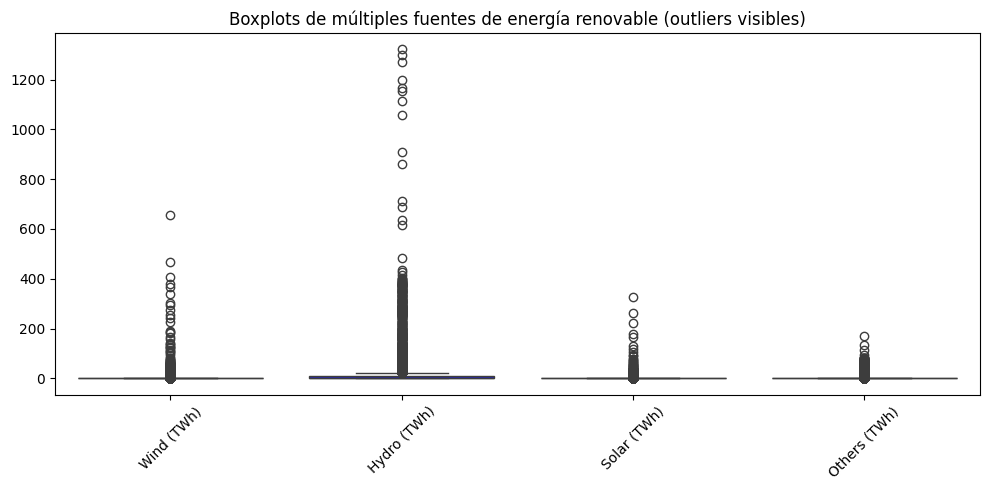

In [ ]:
# Lista de columnas numéricas de las que quiero tomar datos para detectar outliers
cols = ['Wind (TWh)', 'Hydro (TWh)', 'Solar (TWh)', 'Others (TWh)']

# Calcular z-scores para cada columna
z_scores = prod_ren_fil[cols].apply(zscore)

# Detectar outliers
outliers = (np.abs(z_scores) > 3) #Se usa el 3 ya que se considera que es el valor de la desviacion donde cae el 99,7% de los valores

# Visualizar con boxplots
plt.figure(figsize=(10, 5))
sns.boxplot(data=prod_ren_fil[cols], color='blue')
plt.title('Boxplots de múltiples fuentes de energía renovable (outliers visibles)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Lo que podemos preguntarnos en base a los resultados obtenidos en el anterior grafico es a que pais o paises les pertenecen los altos valores de produccion hidroelectrica encontrada que se alejan de la media.

In [ ]:
# Vamos a obtener el nombre del pais o paises cuya produccion hidroelectrica se encuentra por encima de 500 TWh
count_hydro_500 = prod_ren_fil[prod_ren_fil['Hydro (TWh)'] > 500]
print(count_hydro_500['Country'])

1287    China
1288    China
1289    China
1290    China
1291    China
1292    China
1293    China
1294    China
1295    China
1296    China
1297    China
1298    China
1299    China
1300    China
Name: Country, dtype: object


Observamos que aquel que presenta la mayor produccion es China, lo que nos lleva a analizar cual es su situacion en materia de lo anterior.

China es el mayor productor mundial de energía hidroeléctrica, con una producción de 1,301,702 GWh en 2021. La capacidad hidroeléctrica instalada en China en 2021 fue de 390,9 GW, incluyendo 36,4 GW de capacidad hidroeléctrica de almacenamiento por bombeo.

En 2020, China instaló 370 millones de kW de capacidad hidroeléctrica y generó un récord de 1.214 billones de kWh de energía. En total, China es líder mundial en producción hidroeléctrica, con aproximadamente el 29% de la capacidad hidroeléctrica mundial.


In [ ]:
#Cual es el mayor valor de produccion Hidraulica de China y en que a;o fue

# Filtrar los datos de China
china_hydro = prod_ren_fil[prod_ren_fil['Country'] == 'China']

# Obtener el año y valor máximo de producción hidroeléctrica
max_hidro_china = china_hydro.loc[china_hydro['Hydro (TWh)'].idxmax()]
print(f"El mayor valor de producción hidroeléctrica de China fue {max_hidro_china['Hydro (TWh)']} TWh en el año {int(max_hidro_china['Year'])}.")

El mayor valor de producción hidroeléctrica de China fue 1321.71 TWh en el año 2020.


In [ ]:
# Ahora veamos cuanto de la produccion mundial de energia hidroelectrica (En procentaje) lo aporta solamente China



## Producción de energía renovable por continente y su comparación con la distribución mundial

Se reliza una suma de los valores historicos desde 1997, luego se trabaja con sus valores porcentuales ya que aportan mayor informacion en su visualizacion

In [ ]:
production_by_cont = cont_prod.groupby('Country')[['Wind (TWh)', 'Hydro (TWh)', 'Solar (TWh)', 'Others (TWh)']].sum()
continent_percent = production_by_cont.div(production_by_cont.sum(axis=1), axis=0) * 100 #Lo convierto en porcentual para graficar
print(continent_percent)

               Wind (TWh)  Hydro (TWh)  Solar (TWh)  Others (TWh)
Country                                                          
Africa           2.980871    91.895045     1.704251      3.419833
Asia             8.606658    79.698022     4.824527      6.870792
Europe           9.909615    79.655663     2.903867      7.530855
North America    8.084349    81.008779     1.912544      8.994328
Oceania          7.790422    76.789489     4.205834     11.214254
South America    1.985404    93.716886     0.384699      3.913010
World            7.729968    82.267575     2.839695      7.162761


Observando los porcentajes, concluimos en que la tendencia mundial en la utilizacion de energia renovables recaer en la hidroelectrica en primer lugar, seguida por mucha diferencia de la eolica en segundo lugar.

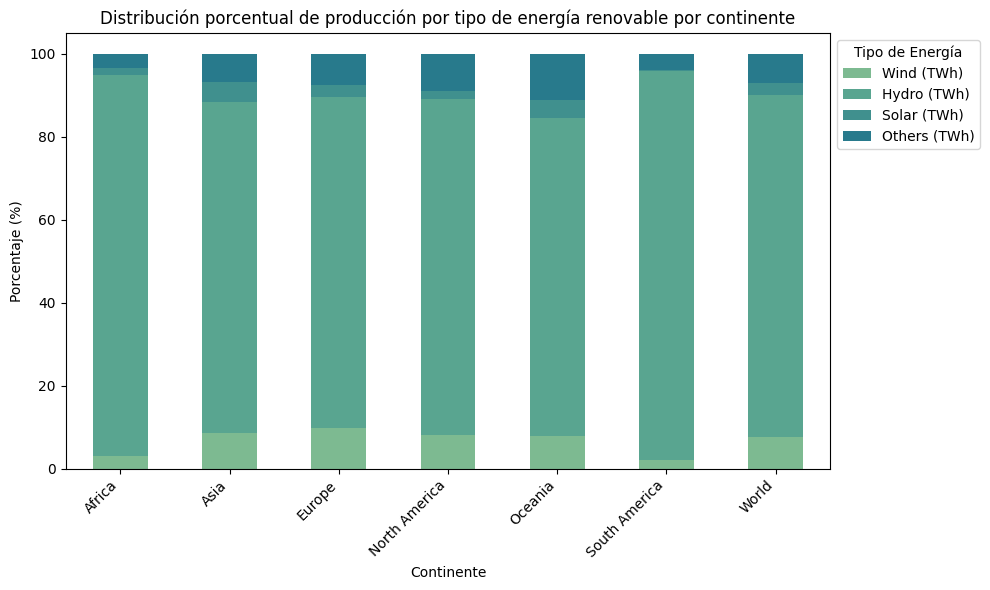

In [ ]:
colors = sns.color_palette("crest")  # "flare", "crest", "rocket_r", "rocket"

continent_percent.plot(kind='bar', stacked=True, figsize=(10,6), color=colors)
plt.title('Distribución porcentual de producción por tipo de energía renovable por continente')
plt.ylabel('Porcentaje (%)')
plt.xlabel('Continente')
plt.xticks(rotation=45, ha='right') #Gira la etiqueta de nombres de las regiones 45 grados debido a que son muy largas
plt.legend(title='Tipo de Energía', bbox_to_anchor=(1,1), loc='upper left') #Ubica la leyenda de los datos en la esquina superior derecha
plt.tight_layout() #Acomoda las cosas en el grafico para que no se superpongan
plt.show()

## Analizamos la produccion de energia renovable por region

In [ ]:
production_by_region = region_prod.groupby('Country')[['Wind (TWh)', 'Hydro (TWh)', 'Solar (TWh)', 'Others (TWh)']].sum()
region_percent = production_by_region.div(production_by_region.sum(axis=1), axis=0) * 100
print(region_percent)

                           Wind (TWh)  Hydro (TWh)  Solar (TWh)  Others (TWh)
Country                                                                      
Asia Pacific                 9.037122    78.624007     5.079989      7.258882
Central America              3.831781    76.290221     1.419332     18.458666
Eastern Africa               0.592874    93.799978     0.381967      5.225181
European Union              16.535060    66.432702     5.327792     11.704447
Middle Africa                0.007729    99.664922     0.076416      0.250934
Middle East                  1.447908    91.858392     6.295193      0.398507
North America                8.084349    81.008779     1.912544      8.994328
South and Central America    2.102738    92.338984     0.451886      5.106392
Western Africa               0.314317    98.024978     0.686425      0.974280


Resulta de interes observar que aunque la tabla es liderada por la energia hidraulica, es posible observar el caso de regiones como Centro America que tiene un gran aporte en la categoria "Others" coincidente con la grandes inversiones realizadas para potenciar la energia proveniente de fuentes geotermicas.

(Ver Costa Rica, El Salvador y Nicaragua)

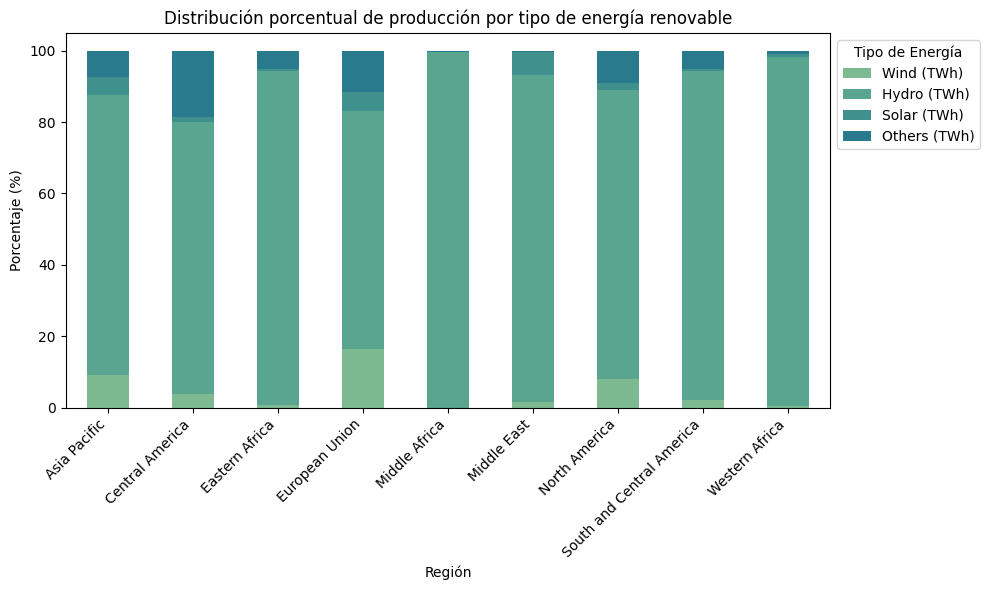

In [ ]:
colors = sns.color_palette("crest")  # "flare", "crest", "rocket_r", "rocket"

region_percent.plot(kind='bar', stacked=True, figsize=(10,6), color=colors)
plt.title('Distribución porcentual de producción por tipo de energía renovable')
plt.ylabel('Porcentaje (%)')
plt.xlabel('Región')
plt.xticks(rotation=45, ha='right') #Gira la etiqueta de nombres de las regiones 45 grados debido a que son muy largas
plt.legend(title='Tipo de Energía', bbox_to_anchor=(1,1), loc='upper left') #Ubica la leyenda de los datos en la esquina superior derecha
plt.tight_layout() #Acomoda las cosas en el grafico para que no se superpongan
plt.show()